## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from scipy.stats import ttest_ind

In [3]:
games = pd.read_csv('C:\datasets/games.csv')

In [4]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


En la columna 'year_of_release' tenemos datos de tipo 'float', los cuales cambiaremos por 'object' toda vez que solamente los usaremos para conocer el año.

La columna 'user_score' presenta valores de tipo 'object' pero debemos modificarlos a 'float' para tratar con ellos correctamente.

## Paso 2. Prepara los datos ##

### Reemplaza los nombres de las columnas (ponlos en minúsculas). ##

In [6]:
games.columns = games.columns.str.lower()

In [7]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Convierte los datos en los tipos necesarios. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué. 

In [8]:
games.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Observamos solamente números enteros, por lo que cambiaremos el type a 'int64'.

In [9]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games.year_of_release.unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

En el caso de la columna 'user_score', los datos son 'object', lo cual limita nuestro manejo estadístico sobre ellos, por lo que los convertiremos a 'float'.

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Podemos observar que reemplacé los 'tbd' por nan, ya que son valores ausentes finalmente.

## Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

In [11]:
games.isna().sum() #buscar valores nulos

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Observamos que existen dos valores ausentes en las columnas 'name' y 'genre'. Así como 264 en la columna 'year_of_release'.
Al ser tan pocos casos pueden ser simplemente un error en la introducción.

En los casos de 'critic_score', 'user_score' y 'rating', puede que sean juegos lanzados antes de que existiera un sistema de rating y crítica para los videojuegos.
Lo conveniente es dejar los valores ausentes tal y como están, toda vez que agregar valores estándar puede afectar el resultado del análisis.

In [12]:
games[games.name.isna()] #Revisamos la columna name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Al ser solamente dos casos y con escasas ventas, podemos simplemente eliminarlos, ya que no afectaría significativamente a nuestro análisis.

In [13]:
games = games.dropna(subset='name')

games[games.name.isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [15]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38



## Paso 3. Analiza los datos

#### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [16]:
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()

print(games_per_year.sort_values(by='name', ascending=False))


    year_of_release  name
28             2008  1427
29             2009  1426
30             2010  1255
27             2007  1197
31             2011  1136
26             2006  1006
25             2005   939
22             2002   829
23             2003   775
24             2004   762
32             2012   653
35             2015   606
34             2014   581
33             2013   544
36             2016   502
21             2001   482
18             1998   379
20             2000   350
19             1999   338
17             1997   289
16             1996   263
15             1995   219
14             1994   121
13             1993    60
1              1981    46
12             1992    43
11             1991    41
2              1982    36
6              1986    21
9              1989    17
3              1983    17
10             1990    16
7              1987    16
8              1988    15
5              1985    14
4              1984    14
0              1980     9


Vamos a graficarlo para un mejor análisis

<Axes: xlabel='year_of_release'>

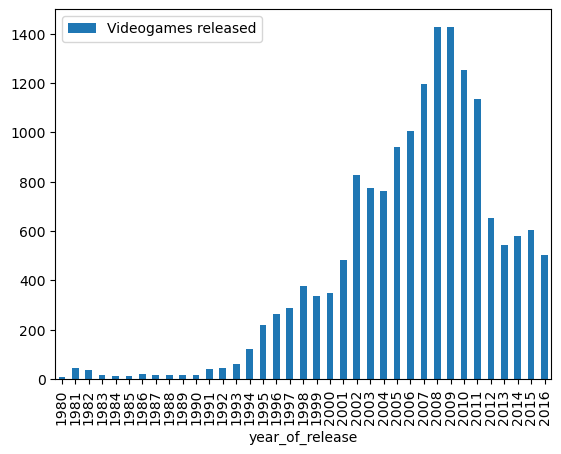

In [17]:
games_per_year.plot(kind='bar', x='year_of_release', y='name', label='Videogames released')

Podemos concluir que no todos los periodos tienen datos significativos, toda vez que de 1980 al 2000 el mercado de los videojuegos era limitado y no nos cuenta mucha historia.
A partir del año 2001 el mercado despegó y podemos obtener buena información de ese periodo.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

In [18]:
sales_by_console = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_by_console.head(10).index  

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

In [19]:
top_platforms = games[games.platform.isin(sales_by_console.head(10).index)]

In [20]:
agg_top_platforms = top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

In [21]:
agg_top_platforms['year_of_release'] = agg_top_platforms['year_of_release'].astype(int)
agg_top_platforms['total_sales'] = agg_top_platforms['total_sales'].astype(float)

c:\Users\jafet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jafet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


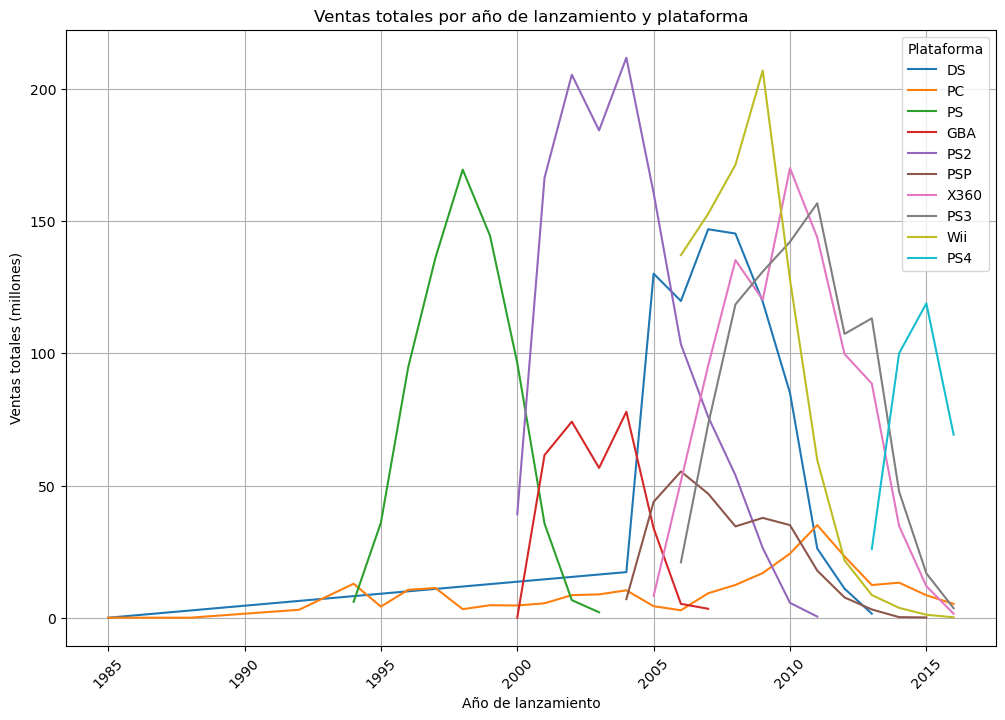

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=agg_top_platforms, x='year_of_release', y='total_sales', hue='platform')

# Añadir título y etiquetas
plt.title('Ventas totales por año de lanzamiento y plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.xticks(rotation=45)

plt.show()

- Podemos observar el crecimiento de las plataformas con el paso del tiempo, de manera cíclica las plataformas venden y después dejan de hacerlo.

- Llama la atención es que la consola 'DS' parece haber tenido lanzamientos en el año 1985, un dato incorrecto, toda vez que la consola fue lanzada hasta el año 2004, por lo que vamos a localizar y arreglar el error.

- La 'PC' ha sido la plataforma más longeva, pero no ha repuntado particularmente en ventas.

In [23]:
top_platforms = top_platforms.drop(index=15957)

top_platforms = top_platforms.reset_index(drop=True)

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [24]:
lc_platform = top_platforms.groupby('platform').agg(
    max_year = ('year_of_release', 'max'),
    min_year = ('year_of_release', 'min')
).reset_index()

lc_platform['lifetime'] = lc_platform['max_year'] - lc_platform['min_year']
lc_platform

,platform,max_year,min_year,lifetime
0,DS,2013,2004,9
1,GBA,2007,2000,7
2,PC,2016,1985,31
3,PS,2003,1994,9
4,PS2,2011,2000,11
5,PS3,2016,2006,10
6,PS4,2016,2013,3
7,PSP,2015,2004,11
8,Wii,2016,2006,10
9,X360,2016,2005,11


In [25]:
lifetime_mean = lc_platform.lifetime.mean()
print("El promedio de vida de una plataforma es de", lifetime_mean, "años")

El promedio de vida de una plataforma es de 11.2 años


### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Al observar que el ciclo de vida de las consolas es de 11 años, lo conveniente para construir un modelo sería tomar en cuenta aquellas plataformas que se han lanzado hasta hace 10 años, es decir, desde el 2007.
Además, este periodo es el que comprende la mayor cantidad de ventas en diferentes plataformas, por lo que es significativo para nuestro análisis.

### Vamos a filtrar el dataframe para solo trabajar con los datos desde el 2007:

In [26]:
games_filtered = games[games['year_of_release'] >= 2007]
display(games_filtered)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [27]:
sales_by_platform = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_platform)

platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64


Las 3 plataformas líderes en ventas son:
- PS3
- Xbox 360
- Wii

In [28]:
top_consoles = games_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
top_consoles_list = top_consoles.head(10).index
top_consoles_list

Index(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PSP', 'PS2', 'PC', 'XOne'], dtype='object', name='platform')

c:\Users\jafet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jafet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


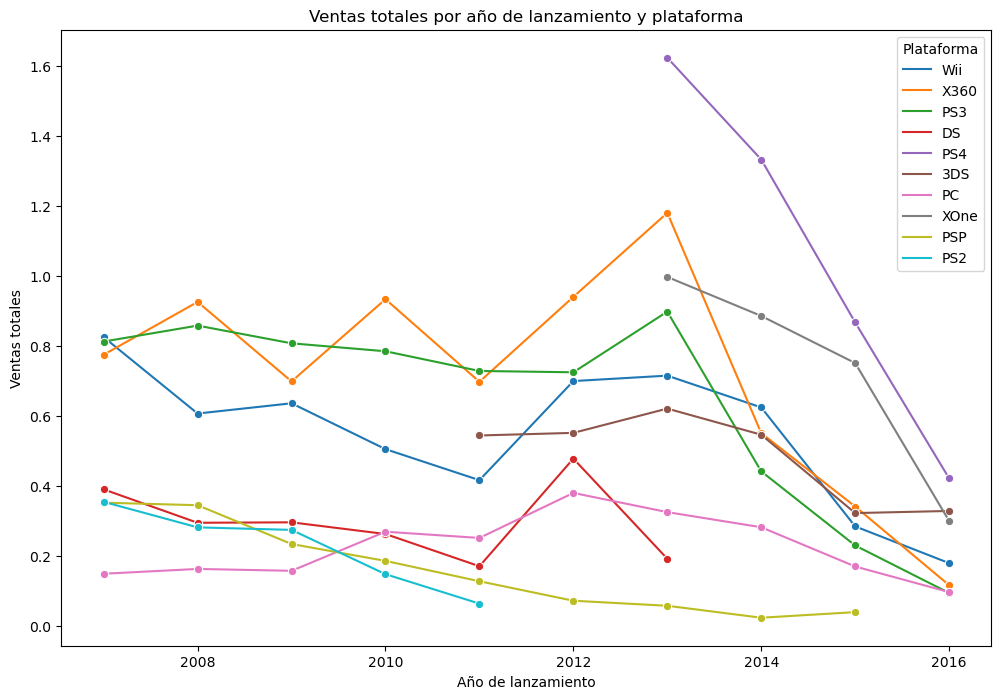

In [29]:
platform_data = games_filtered[games_filtered['platform'].isin(top_consoles_list)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=platform_data, x='year_of_release', y='total_sales', hue='platform', marker='o', errorbar=None)

plt.title('Ventas totales por año de lanzamiento y plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.legend(title='Plataforma')
plt.show()

- Podemos observar que PS4 generó la mayor cantidad de ventas en su año de lanzamiento, yendo en declive pero permaneciendo como la consola con mayor número de ventas.
- XOne parece haber tenido un buen lanzamiento y sus números permaecen buenos después de un ligero declive.
- X360 y PS3 tuvieron buenas ventas también en 2013, pero parecen ir a la baja, tal vez relacionado con la llegada de nuevas generaciones.
- 3DS parece haber tenido un repunte ligero en el año 2015.

Como plataformas potencialmente rentables elegiría PS4, XOne y 3DS, son aquellas que mantienen buenos números y que son consideradas de la nueva generación, por lo que tienen, por lo menos, la mitad de su ciclo de vida.

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

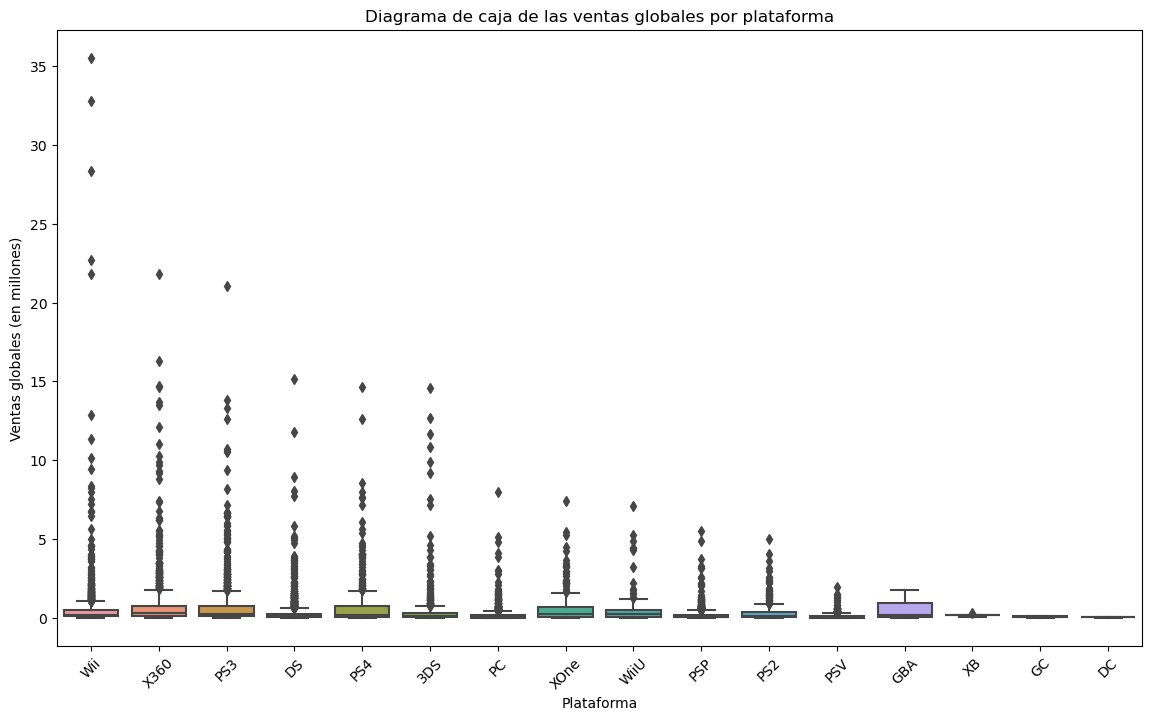

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=games_filtered, x='platform', y='total_sales')

plt.title('Diagrama de caja de las ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')

plt.xticks(rotation=45)

plt.show()

Distribución de las Ventas por Plataforma:

- Wii y X360 parecen tener algunos de los valores atípicos más altos, con juegos que han vendido más de 20 millones de unidades.
- PS3, DS, PS4, y 3DS también muestran una alta dispersión en las ventas.
- Plataformas como GBA, XB, GC y DC tienen cajas pequeñas, indicando una baja variabilidad en las ventas.

Diferencias Significativas en las Ventas:

- Las plataformas Wii, X360, y PS3 tienen medianas de ventas más altas comparadas con otras plataformas, indicando que los juegos en estas plataformas tienden a vender más en promedio.
- Las plataformas más nuevas como PS4 y XOne también muestran una tendencia creciente en ventas, aunque con menos datos históricos.

Ventas Promedio en Varias Plataformas:

- Las ventas promedio en plataformas como Wii y X360 son altas, pero también presentan una gran variabilidad.
- Las plataformas más nuevas, como PS4 y XOne, muestran un promedio de ventas prometedor, con potencial para crecer más en el futuro.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

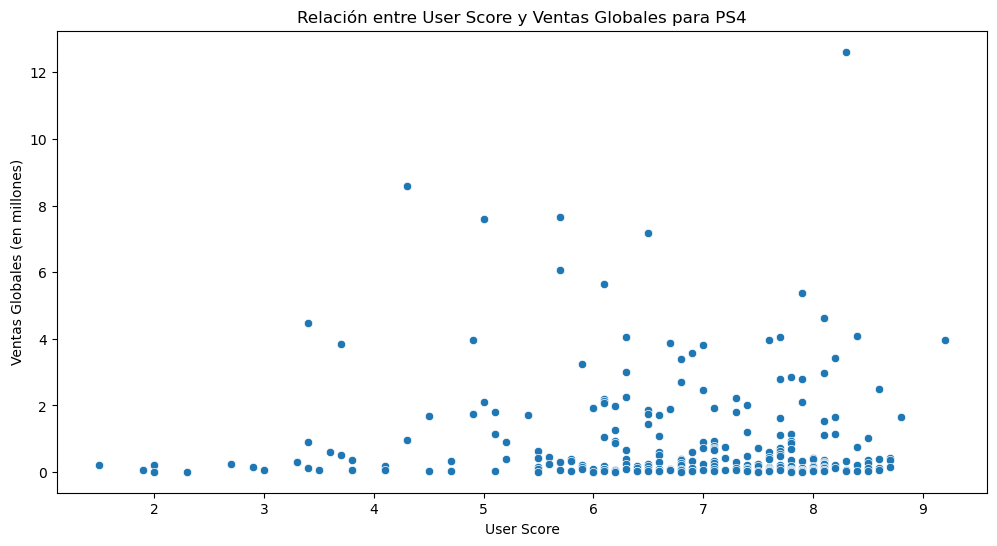

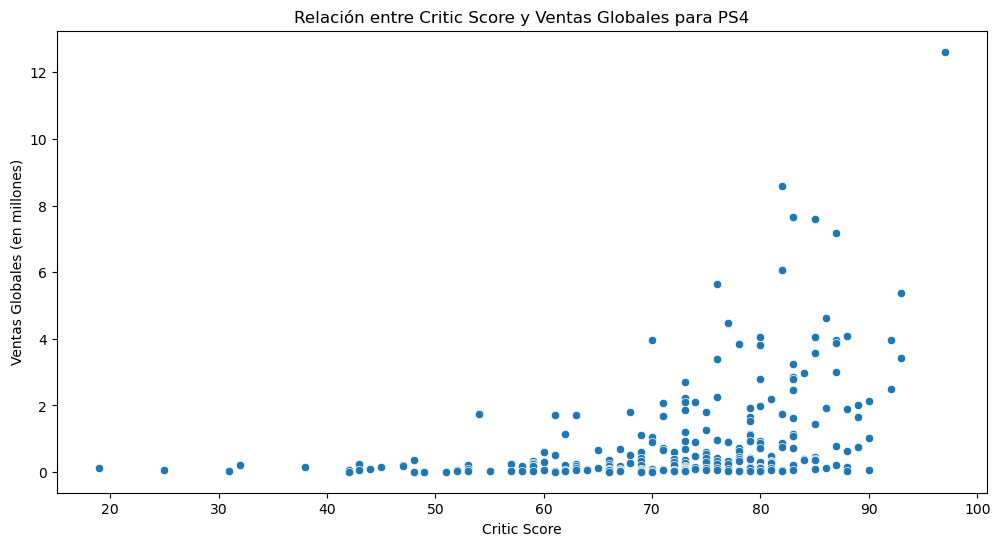

(-0.031957110204556424, 0.40656790206178095)

In [31]:
ps4_games = games_filtered[games_filtered['platform'] == 'PS4']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')
plt.title('Relación entre User Score y Ventas Globales para PS4')
plt.xlabel('User Score')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales')
plt.title('Relación entre Critic Score y Ventas Globales para PS4')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

user_score_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])
critic_score_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])

user_score_corr, critic_score_corr

### Relación entre críticas de los usuarios y ventas de PS4.

El valor de correlación de aproximadamente -0.032 sugiere una relación muy débil entre las reseñas de usuarios y las ventas globales para los juegos de PS4.

Aunque el valor es negativo, su magnitud es muy pequeña, lo que indica que, en general, no hay una relación lineal significativa entre las dos variables. 

### Relación entre críticas de los profesionales y ventas de PS4.

El valor de correlación de aproximadamente 0.407 sugiere una relación moderada positiva entre las reseñas de críticos y las ventas globales para los juegos de PS4.

El valor positivo indica que a medida que las puntuaciones de los críticos aumentan, las ventas tienden a aumentar también. Esto sugiere que los juegos con mejores reseñas de críticos tienden a vender más.

Comparado con la correlación entre las reseñas de usuarios y las ventas globales, la correlación con las reseñas de críticos es mucho más fuerte y positiva, indicando que las críticas profesionales podrían tener un mayor efecto en las ventas de juegos.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [32]:
multiplatform_games = games_filtered[games_filtered.duplicated(subset='name', keep=False)]

grouped_sales = multiplatform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

avg_sales_by_platform = grouped_sales.groupby('platform')['total_sales'].mean().sort_values(ascending=False).reset_index()
print(avg_sales_by_platform)

   platform  total_sales
0       PS4     0.876344
1      X360     0.807324
2       PS3     0.761693
3      XOne     0.603080
4       Wii     0.507588
5       PS2     0.423206
6        DS     0.360688
7       3DS     0.311742
8      WiiU     0.302424
9       PSP     0.294640
10       PC     0.239309
11       XB     0.183333
12      PSV     0.147711
13      GBA     0.140000
14       GC     0.067500


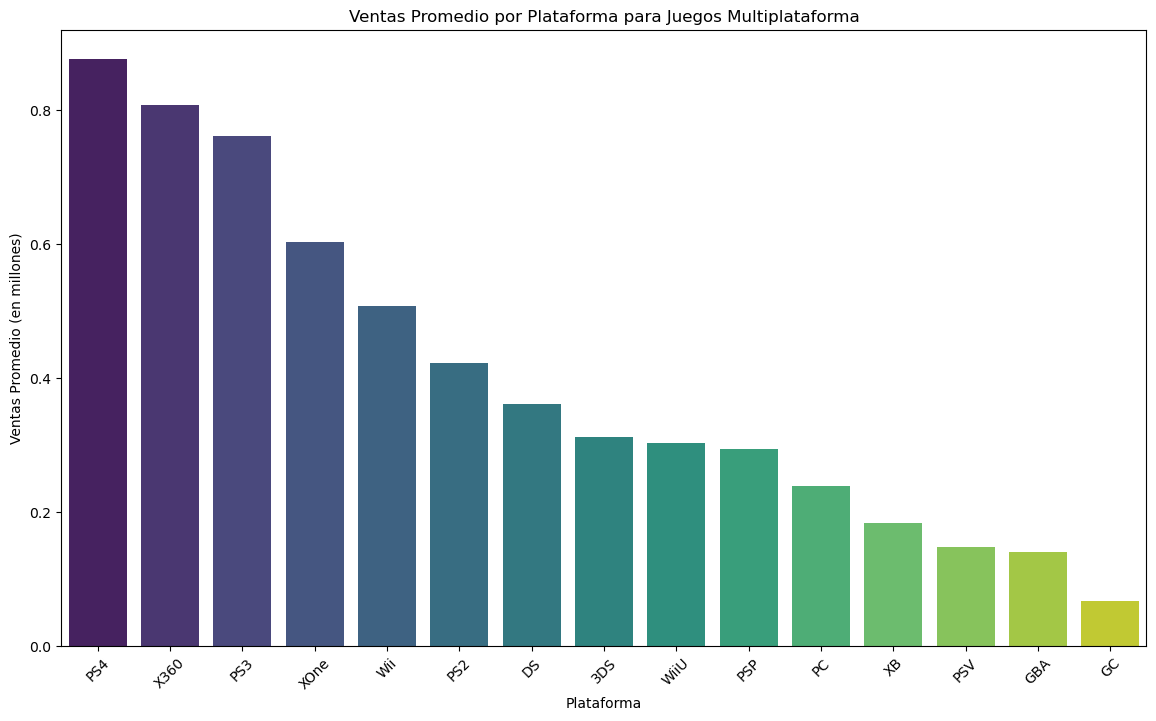

In [33]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_sales_by_platform, x='platform', y='total_sales', palette='viridis')
plt.title('Ventas Promedio por Plataforma para Juegos Multiplataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Promedio (en millones)')
plt.xticks(rotation=45)
plt.show()

Con esta gráfica podemos apreciar claramente que la consola que más ha vendido es el PS4, lo que la hace la plataforma con más potencial del mercado.
Es seguida por X360 y PS3, pero son consolas que ya están al final de su ciclo de vida con la llegada de la nueva generación.
XOne se mantiene detrás al ser una consola reciente y cuyo ciclo de vida apenas está a la mitad, por lo que cuenta con potencial importante.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [34]:
sales_by_genre = games_filtered.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    avg_sales=('total_sales', 'mean')
).reset_index()

# Ordenar los datos por ventas totales
sales_by_genre = sales_by_genre.sort_values(by='total_sales', ascending=False)

# Mostrar los datos
display(sales_by_genre)

,genre,total_sales,avg_sales
0,Action,1050.59,0.477975
8,Shooter,678.80,1.016168
10,Sports,658.07,0.585472
3,Misc,487.89,0.426105
7,Role-Playing,465.03,0.524865
6,Racing,265.19,0.544538
4,Platform,230.45,0.805769
9,Simulation,199.13,0.362714
2,Fighting,166.00,0.463687
1,Adventure,129.99,0.136544


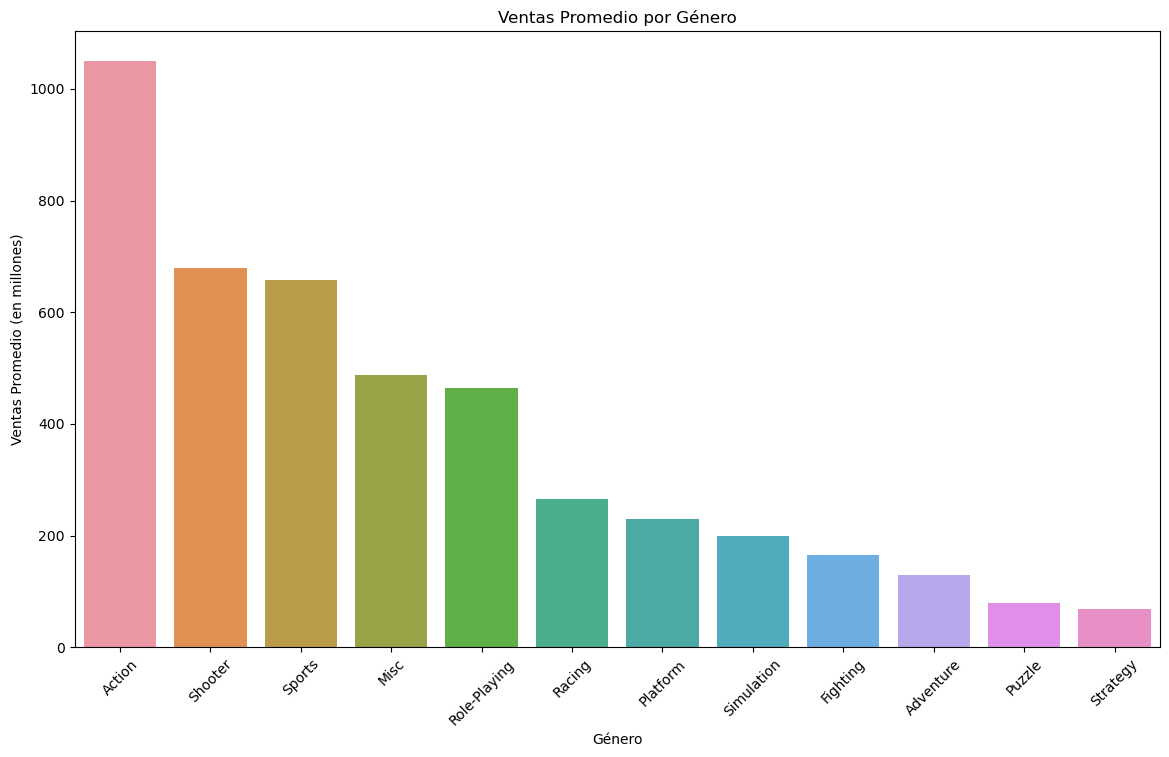

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_genre, x='genre', y='total_sales')
plt.title('Ventas Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Promedio (en millones)')
plt.xticks(rotation=45)
plt.show()

### Generalizaciones

Géneros con Ventas Altas:

- Géneros como acción, disparos y deportes tienen tanto altos volúmenes de ventas totales como buenas ventas promedio por juego. Estos géneros pueden atraer a una amplia audiencia, asegurando tanto lanzamientos exitosos como un mercado constante.

Géneros con Ventas Bajas:

- Géneros como puzzle, estrategia y aventura tienen tanto bajos volúmenes de ventas totales como bajas ventas promedio por juego. Estos géneros pueden estar dirigidos a nichos más específicos y, por lo tanto, no generan las mismas cifras de ventas que los géneros más populares.

### Conclusiones

Los géneros más rentables, como acción, disparos y deportes, deberían ser los principales enfoques para futuros desarrollos y estrategias de marketing. Sin embargo, entender y atender a los nichos específicos en géneros menos rentables también puede ser una estrategia efectiva si se ejecuta correctamente, aprovechando la lealtad de un público más pequeño pero dedicado.

## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. 
- Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [36]:
market_sales = top_platforms.groupby('platform').agg({
    'na_sales' : 'sum',
    'eu_sales' : 'sum',
    'jp_sales' : 'sum'
}).reset_index()

In [37]:
market_sales

,platform,na_sales,eu_sales,jp_sales
0,DS,382.40,188.89,175.55
1,GBA,187.54,75.25,47.33
2,PC,94.53,142.44,0.17
3,PS,336.52,213.61,139.82
4,PS2,583.84,339.29,139.20
5,PS3,393.49,330.29,80.19
6,PS4,108.74,141.09,15.96
7,PSP,109.17,66.68,76.78
8,Wii,496.90,262.21,69.33
9,X360,602.47,270.76,12.43


In [38]:
market_sales = pd.melt(market_sales, id_vars = ['platform'],
        value_vars = ['na_sales', 'eu_sales', 'jp_sales'],
        var_name = 'market',
        value_name = 'sales'
)

In [39]:
market_sales

,platform,market,sales
0,DS,na_sales,382.40
1,GBA,na_sales,187.54
2,PC,na_sales,94.53
3,PS,na_sales,336.52
4,PS2,na_sales,583.84
5,PS3,na_sales,393.49
6,PS4,na_sales,108.74
7,PSP,na_sales,109.17
8,Wii,na_sales,496.90
9,X360,na_sales,602.47


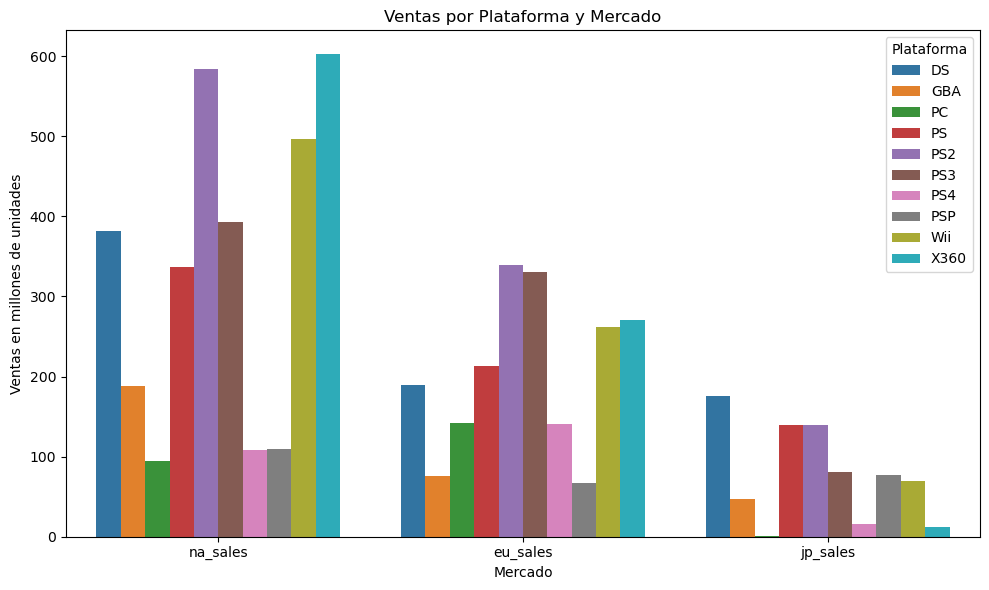

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=market_sales, x='market', y='sales', hue='platform')
plt.xlabel('Mercado')
plt.ylabel('Ventas en millones de unidades')
plt.title('Ventas por Plataforma y Mercado')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

### Plataformas principales

### NA:
1. X360
2. PS2
3. Wii
4. PS3
5. DS

### EU:
1. PS2
2. PS3
3. X360
4. Wii
5. PS

### JP:
1. DS
2. PS
3. PS2
4. PS3
5. PSP


### Variaciones entre un mercado y otro:

En América del Norte, X360 es la plataforma líder con una gran ventaja sobre Wii y PS2, que también son fuertes. 

En Europa, PS2 lidera seguida de PS3 y X360 también fuertemente posicionada. 

En Japón, DS lidera, seguida de PS y PS2. PS3 y Wii tienen una presencia menor en comparación con las otras regiones.

En Japón, la preferencia por portátiles como DS y PSP es evidente, con PS2 también siendo popular. X360 tiene una presencia mínima.




In [41]:
genre_by_region = games_filtered.groupby('genre').agg({
    'na_sales' : 'sum',
    'eu_sales' : 'sum',
    'jp_sales' : 'sum'
}).reset_index()

# Ordenar los datos por ventas totales
genre_by_region = genre_by_region.sort_values(by='genre', ascending=False)

# Mostrar los datos
display(genre_by_region)

,genre,na_sales,eu_sales,jp_sales
11,Strategy,26.42,23.27,13.22
10,Sports,323.86,211.49,40.28
9,Simulation,97.19,63.62,20.93
8,Shooter,350.11,230.16,17.46
7,Role-Playing,175.41,102.67,150.55
6,Racing,112.68,104.63,12.33
5,Puzzle,38.12,25.69,9.03
4,Platform,111.14,69.82,25.99
3,Misc,259.16,127.62,48.79
2,Fighting,81.87,38.15,25.79


In [42]:
genre_sales = pd.melt(genre_by_region, id_vars = ['genre'],
        value_vars = ['na_sales', 'eu_sales', 'jp_sales'],
        var_name = 'market',
        value_name = 'sales'
)

In [43]:
genre_sales

,genre,market,sales
0,Strategy,na_sales,26.42
1,Sports,na_sales,323.86
2,Simulation,na_sales,97.19
3,Shooter,na_sales,350.11
4,Role-Playing,na_sales,175.41
5,Racing,na_sales,112.68
6,Puzzle,na_sales,38.12
7,Platform,na_sales,111.14
8,Misc,na_sales,259.16
9,Fighting,na_sales,81.87


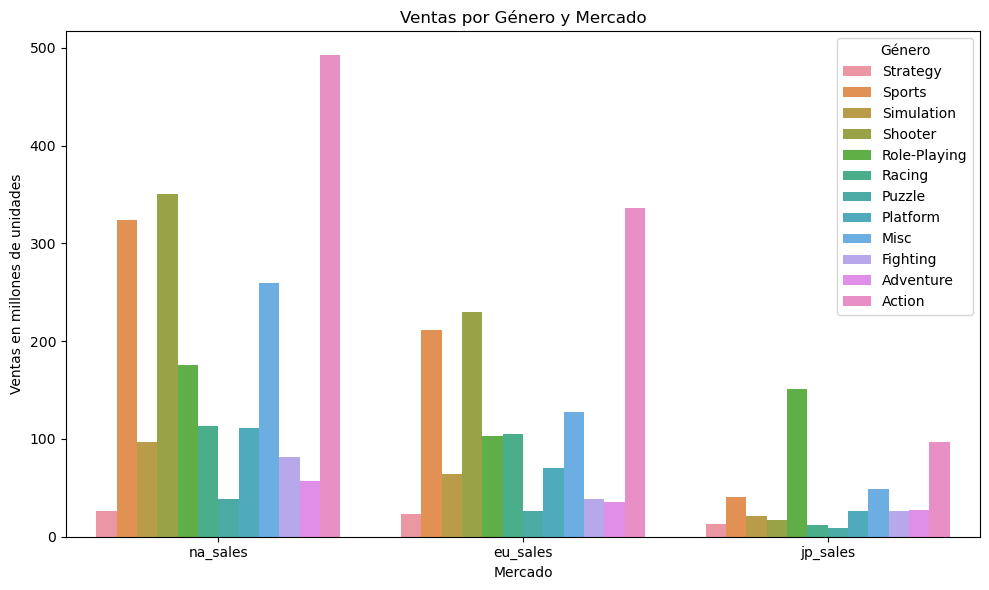

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_sales, x='market', y='sales', hue='genre')
plt.xlabel('Mercado')
plt.ylabel('Ventas en millones de unidades')
plt.title('Ventas por Género y Mercado')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

### NA:

1. Action
2. Shooter
3. Sports
4. Misc
5. Role-Playing

En NA, los géneros principales son dominados por juegos de acción, disparos y deportes, que reflejan la preferencia por experiencias dinámicas y competitivas.

### EU:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

EU muestra un patrón similar a NA con una fuerte inclinación hacia los juegos de acción, disparos y deportes. Sin embargo, los juegos de rol y carreras también tienen una presencia significativa.

### JP:

1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Sports

En JP, los juegos de rol ocupan el primer lugar. Los juegos de acción también son populares, seguidos por una variedad de géneros como simulación y deportes, mostrando una diversidad en las preferencias de los jugadores japoneses.

Estas diferencias en los géneros principales entre América del Norte, Europa y Japón pueden explicarse por diversos factores culturales, históricos y de preferencia de juego en cada región. La influencia de los desarrolladores locales, las tendencias del mercado y las preferencias de los jugadores son todos factores que contribuyen a estas variaciones observadas en el mercado de videojuegos global.

In [45]:
rating_sales_na = games_filtered.groupby('rating')['na_sales'].mean().reset_index()
rating_sales_eu = games_filtered.groupby('rating')['eu_sales'].mean().reset_index()
rating_sales_jp = games_filtered.groupby('rating')['jp_sales'].mean().reset_index()

print("Promedio de Ventas en América del Norte por Clasificación ESRB:")
print(rating_sales_na)

print("\nPromedio de Ventas en Europa por Clasificación ESRB:")
print(rating_sales_eu)

print("\nPromedio de Ventas en Japón por Clasificación ESRB:")
print(rating_sales_jp)

Promedio de Ventas en América del Norte por Clasificación ESRB:
  rating  na_sales
0      E  0.305283
1   E10+  0.251407
2     EC  0.220000
3      M  0.536886
4     RP  0.000000
5      T  0.234716

Promedio de Ventas en Europa por Clasificación ESRB:
  rating  eu_sales
0      E  0.180726
1   E10+  0.142264
2     EC  0.000000
3      M  0.379037
4     RP  0.030000
5      T  0.137731

Promedio de Ventas en Japón por Clasificación ESRB:
  rating  jp_sales
0      E  0.043706
1   E10+  0.027893
2     EC  0.000000
3      M  0.040363
4     RP  0.000000
5      T  0.047244


In [46]:
corr_na = games_filtered[['na_sales', 'rating']].groupby('rating').corr().reset_index()
print("Correlación en América del Norte:")
print(corr_na)

# Calcular la correlación para Europa
corr_eu = games_filtered[['eu_sales', 'rating']].groupby('rating').corr().reset_index()
print("\nCorrelación en Europa:")
print(corr_eu)

# Calcular la correlación para Japón
corr_jp = games_filtered[['jp_sales', 'rating']].groupby('rating').corr().reset_index()
print("\nCorrelación en Japón:")
print(corr_jp)



Correlación en América del Norte:
  rating   level_1  na_sales
0      E  na_sales       1.0
1   E10+  na_sales       1.0
2     EC  na_sales       1.0
3      M  na_sales       1.0
4     RP  na_sales       NaN
5      T  na_sales       1.0

Correlación en Europa:
  rating   level_1  eu_sales
0      E  eu_sales       1.0
1   E10+  eu_sales       1.0
2     EC  eu_sales       NaN
3      M  eu_sales       1.0
4     RP  eu_sales       NaN
5      T  eu_sales       1.0

Correlación en Japón:
  rating   level_1  jp_sales
0      E  jp_sales       1.0
1   E10+  jp_sales       1.0
2     EC  jp_sales       NaN
3      M  jp_sales       1.0
4     RP  jp_sales       NaN
5      T  jp_sales       1.0


En América del Norte y Europa, los juegos con clasificación "M" tienden a tener las ventas promedio más altas, indicando una preferencia por contenido más maduro en estas regiones.

En Japón, los juegos con clasificación "T" tienen un promedio de ventas más alto, sugiriendo una aceptación de contenido orientado a adolescentes en este mercado.

Las clasificaciones de ESRB parecen influir en las ventas de videojuegos de manera significativa en cada región, reflejando diferencias culturales y preferencias de los consumidores.

## Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

La hipótesis nula siempre es la igualdad.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Usaremos el ttest para muestras independientes. Este test es adecuado para comparar las medias de dos grupos independientes.

El test de Levene evalúa la igualdad de varianzas entre los grupos.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distitntas.




In [47]:
score_xone = games_filtered[games_filtered['platform'] == 'XOne']['user_score'].dropna()
score_pc = games_filtered[games_filtered['platform'] == 'PC']['user_score'].dropna()

Usaremos el valor de umbral estándar de 0.05 para aplha.

Desconocemos las desviaciones estándar, por lo que realizaremos un ttest.

In [48]:
from scipy.stats import levene

statistic, p_value = levene(score_xone, score_pc)

alpha = 0.05 

print(f"Estadístico de Levene: {statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

Estadístico de Levene: 2.411376815228047
Valor p: 0.12087767238500854
Las varianzas son iguales


In [49]:
alpha = 0.05

_, p_value = ttest_ind(
    score_xone,
    score_pc,
    equal_var = True
)

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [50]:
action_scores = games_filtered[games_filtered['genre'] == 'Action']['user_score'].dropna()
sports_scores = games_filtered[games_filtered['genre'] == 'Sports']['user_score'].dropna()

In [51]:
from scipy.stats import levene

statistic, p_value = levene(action_scores, sports_scores)

alpha = 0.05 

print(f"Estadístico de Levene: {statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

Estadístico de Levene: 27.645703070988105
Valor p: 1.63048164734554e-07
Las varianzas no son iguales


In [52]:
alpha = 0.05

_, p_value = ttest_ind(
    action_scores,
    sports_scores,
    equal_var = False
)

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula


## Paso 6. Escribe una conclusión general


El análisis realizado nos muestra claramente que las tendencias entre regiones son diferentes, su preferencia por consolas y géneros, por lo que se tendrían que preparar planes especificos para cada una de ellas si es que se busca triunfar globalmente.

También hay que tomar en cuenta que las críticas de los profesionales afectan directamente el éxito comercial de un título.

Se deben tomar en cuenta solamente datos recientes, de máximo 10 años atrás para que sean significativos. Asimismo se debe considerar qué plataformas tienen mayor potencial o crecimiento, si su ciclo de vida está próximo a terminar o si aún no repunta en su máximo esplendor.